In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def generate_data(N):
    X = torch.randint(0,9, size = (N, 10))
    num2s = torch.count_nonzero(X == 2, dim = -1)
    num4s = torch.count_nonzero(X == 4, dim = -1)
    
    labels = (num4s > num2s)
    
    return X, labels.reshape(-1,1).float()


In [2]:
class AttentionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.query = torch.nn.Parameter(torch.randn(1,16))
        self.embed_func = torch.nn.Embedding(10, embedding_dim=16)
        self.key_func = torch.nn.Linear(16,16)        
        
        self.value_func = torch.nn.Sequential(
            torch.nn.Linear(16,32),
            torch.nn.ReLU(),
            torch.nn.Linear(32,1)
        )
        
        se ard(self, X):
        embedX = self.embed_func(X)
        keys = self.key_func(embedX)        
        qk = torch.einsum('ie, bje -> bij', self.query, keys)
        qk = qk / 16**0.5
        att = torch.nn.functional.softmax(qk, dim = -1)        
        
        vals = self.value_func(embedX)        
        summary = torch.einsum('bij, bje->bie', att, vals)[:,0,:]        
        
        pred = self.head_mlp(summary)
        
        return pred, att, vals

In [23]:
def train():
    model = AttentionModel()
    opt = torch.optim.Adam(model.parameters(), lr = 3e-4)
    losses = []
    for idx in range(5_000):
        X, y = generate_data(123)
        p, a, v = model(X)
        loss = torch.nn.functional.binary_cross_entropy(p,y)
        losses.append(float(loss))
        if idx % 100 == 0:
            print(float(loss))
            plt.plot(losses)
            plt.gcf().set_size_inches(2,2)
            plt.show()
        loss.backward()
        opt.step()
        opt.zero_grad()
    return model

0.6791958808898926


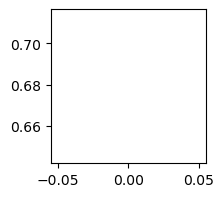

0.5722739100456238


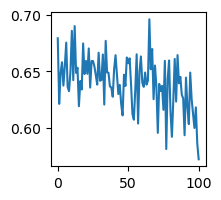

0.3677409887313843


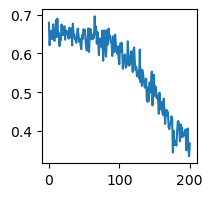

0.16549964249134064


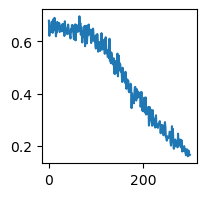

0.07901409268379211


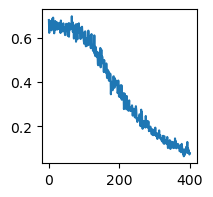

0.050212979316711426


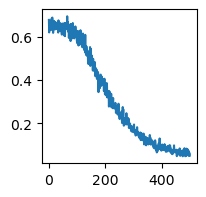

0.04245413839817047


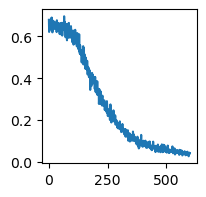

0.02680930867791176


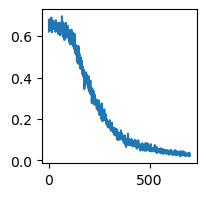

0.02433079667389393


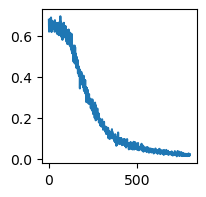

0.015994682908058167


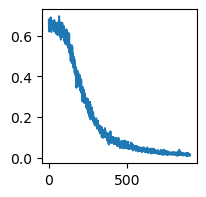

0.01193500030785799


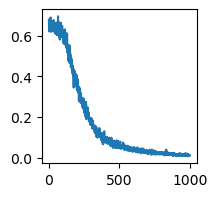

0.006661929190158844


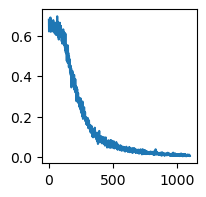

0.004093013238161802


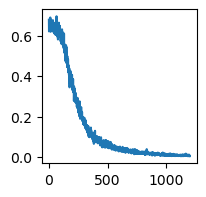

0.0067224036902189255


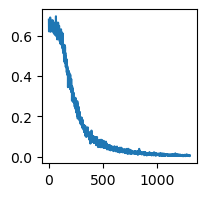

0.00452601769939065


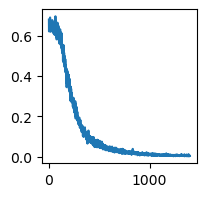

0.0045048329047858715


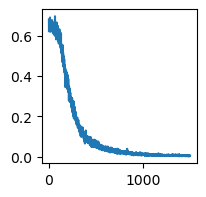

0.0015586200170218945


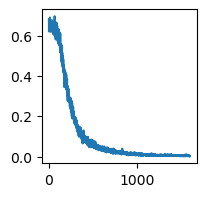

0.004281987436115742


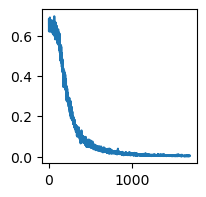

0.0010777261340990663


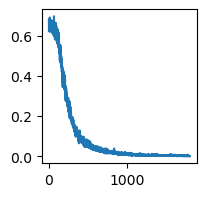

0.0016944592352956533


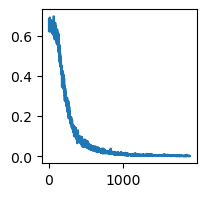

0.000819784530904144


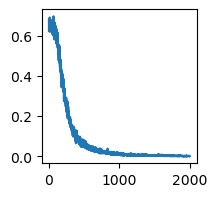

0.001337196328677237


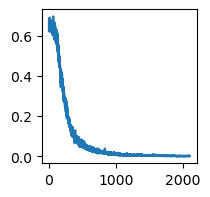

0.0008918347302824259


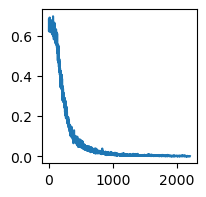

0.0012330200988799334


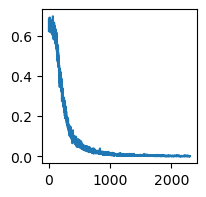

0.0011217735009267926


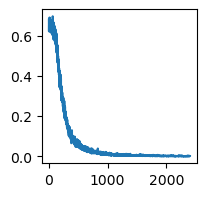

0.0006812739884480834


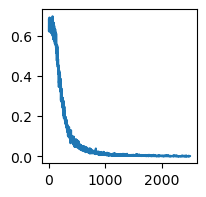

0.00030841625994071364


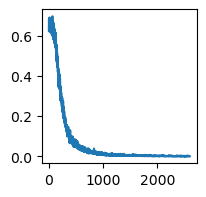

0.0006476886919699609


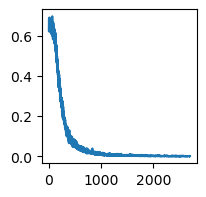

0.0006226066616363823


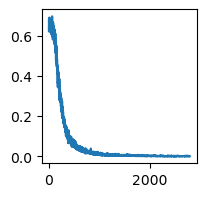

0.0007179816602729261


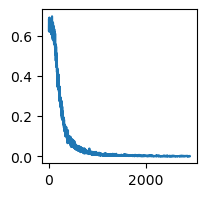

0.0006116348085924983


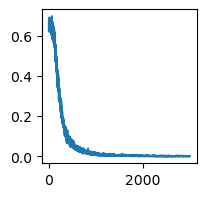

0.00022925353550817817


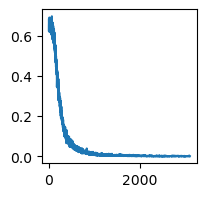

0.0004691478388849646


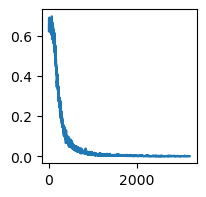

0.00041948005673475564


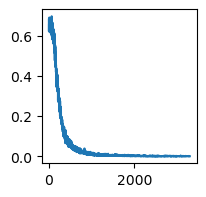

0.00028271658811718225


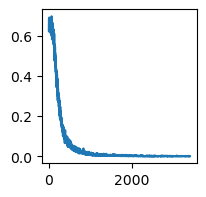

0.00014702127373311669


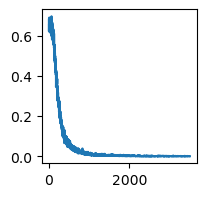

0.0007242165156640112


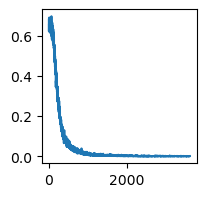

0.00025832041865214705


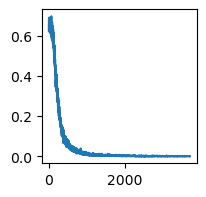

0.0001875402667792514


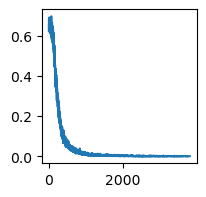

0.00016803923062980175


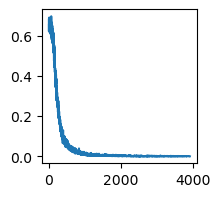

0.00015857239486649632


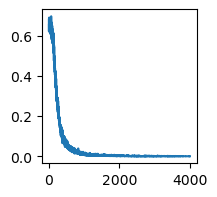

0.00020960593246854842


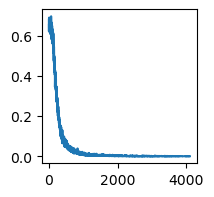

0.00011463464761618525


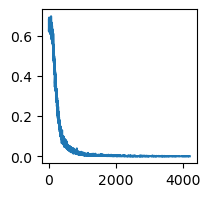

3.510641909088008e-05


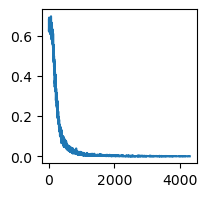

0.00014887852012179792


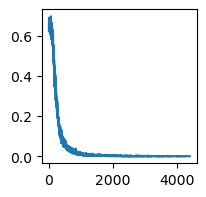

0.00025301455752924085


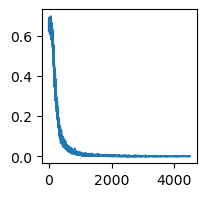

0.00011833648022729903


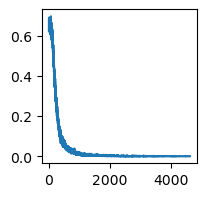

0.00013137572386767715


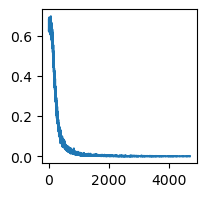

9.784325811779127e-05


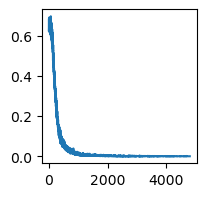

0.00024888222105801105


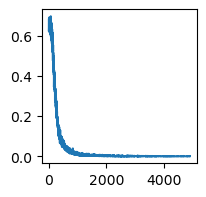

In [24]:
model = train();

In [84]:
with torch.no_grad():
    X = torch.LongTensor([[4,4,4,2,4,1,3,0,8,6]])
    p,a,v = model(X)

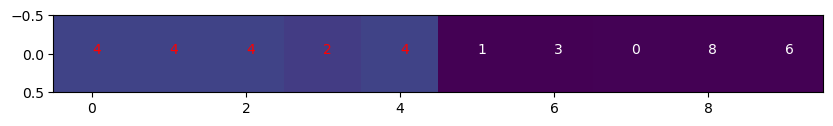

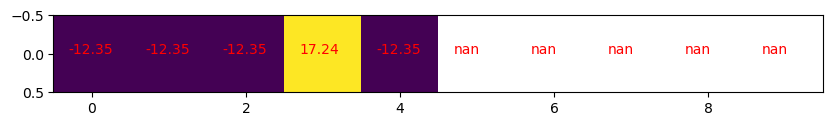

In [85]:
plt.imshow(a[0], vmin = 0, vmax = 1)
for x,y,d in zip(np.arange(10),np.zeros(10),X[0]):
    plt.text(x,y,int(d), c = 'r' if d in [4,2] else 'w')

plt.gcf().set_size_inches(10,1)
plt.show()


msges = v[:,:,0]
msges = np.where(a[0] > 0.1, v[:,:,0], np.nan*v[:,:,0])
plt.imshow(msges)
plt.gcf().set_size_inches(10,1)

for x,y,d in zip(np.arange(10),np.zeros(10),msges[0]):
    plt.text(x-0.3,y,f'{d:.2f}', c = 'r')

plt.gcf().set_size_inches(10,1)
plt.show()


In [86]:
!open .